## Algorithmic Trading(HFT) in Python

In [1]:
#Setting up the required libraries
library(quantmod)
library(tidyverse)
library(TTR)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()


In [2]:
#Obtaining stock price data for Advanced Auto Parts Inc
AAP <- getSymbols("AAP", source="yahoo", auto.assign=FALSE,
                    return.class="xts")[,6]

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



In [3]:
#Calculate returns
AAPret <- diff(log(AAP))
colnames(AAPret)  <- "AAP"

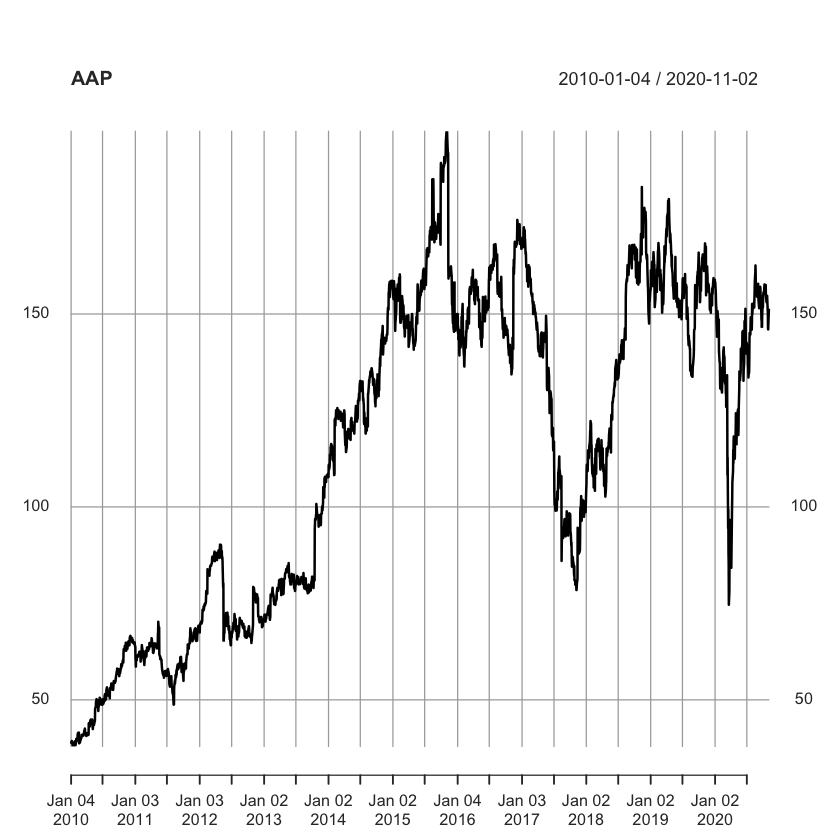

In [5]:
#Trim the dataset 
AAPret <- AAPret["2010/"]
AAP <- AAP["2010/"]
plot(AAP)

In [6]:
#Generate Simple Moving Averages
sma26 <- SMA(AAP, 26)
sma12 <- SMA(AAP, 12)

In [7]:
Data <- na.omit(as.data.frame(cbind(AAP, AAPret, sma12, sma26)))
colnames(Data) <- c("AAPPrices","AAPRet","SMA12","SMA26" )

In [8]:
#Condition for trend following strategy
Data$UD <- ifelse(Data$SMA12 >= Data$SMA26, 1, 0)
class(Data$UD)

[1] "numeric"

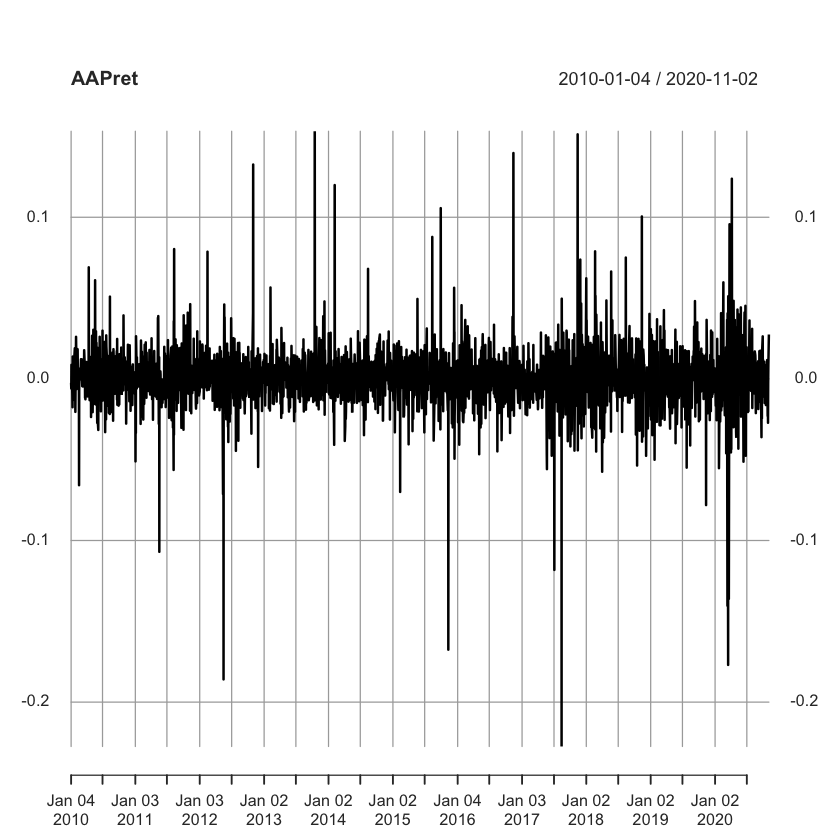

In [9]:
#Devise a trading strategy and Backtest
Data$Trade <- ifelse(Data$UD == 1, "BUY", "SELL")
Data$Position <- ifelse(Data$Trade == "BUY", 1, -1)
Data$AlgoRet <- Data$AAPRet * Data$Position
AnnualizedReturn <- ((mean(Data$AlgoRet)+1)^252 - 1)
plot(AAPret)
Standev <- sd(Data$AlgoRet)
rf <- 0.02
SharpeRatio <- (AnnualizedReturn - rf)/Standev

In [10]:
#Print the results
print(paste("The trend-following algorithm was applied to the AAP Stock prices and was able to achieve an Annualized Return of", AnnualizedReturn,"%"))

[1] "The trend-following algorithm was applied to the AAP Stock prices and was able to achieve an Annualized Return of 0.129069943165444 %"


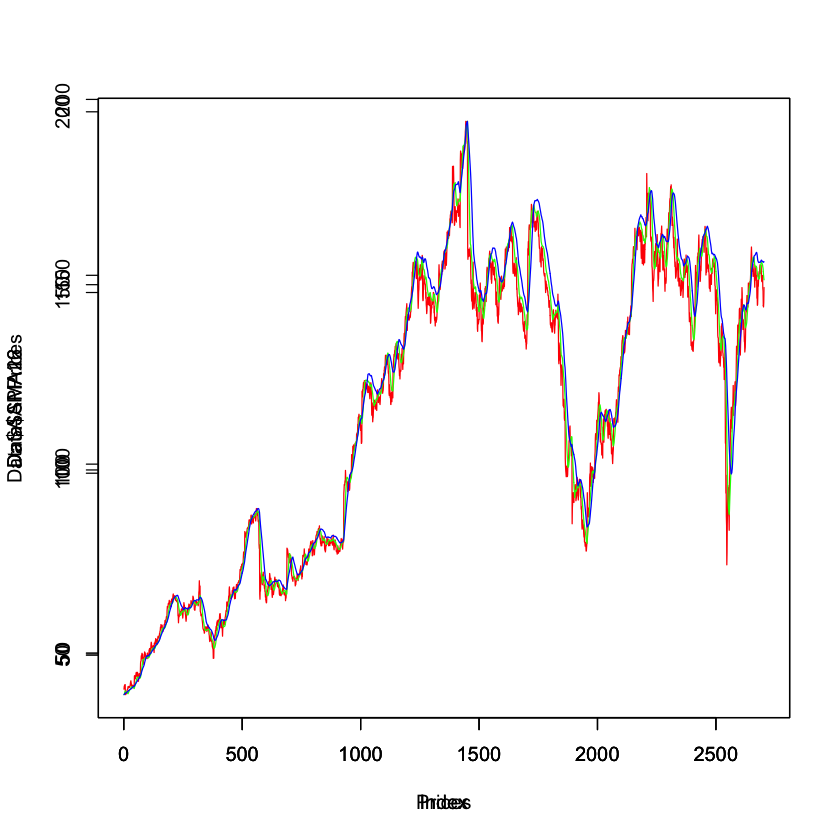

In [11]:
#plot original stock prices along with short and sell 
plot(Data$AAPPrices, type = "l", col = "red", xlab = "Prices")
par(new = TRUE)
plot(Data$SMA12, type = "l" , col = "green")
par(new = TRUE)
plot(Data$SMA26, type = "l" , col = "blue")